<h2>Importamos las librerías necesarias</h2>

In [14]:
from __future__ import absolute_import,division,print_function,unicode_literals
import os
#Importamos TF y Keras
import tensorflow as tf
from tensorflow import keras
#Para nombrar archivos
import datetime
import numpy as np
import matplotlib.pyplot as plt


<h2>Cargamos el Dataset a utilizar</h2>

In [15]:
f=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=f.load_data()

<h2>Comprobamos que fue cargado correctamente</h2>

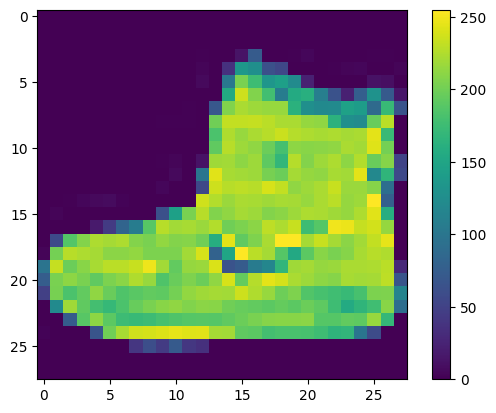

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<h2>Creamos las etiquetas</h2>

In [17]:
class_names=['Camiseta','Pantalon','Sueter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla Deportiva','Bolso','Botines']

<h2>Reescalamos los datos de entrenamiento y testeo</h2>

In [18]:
train_images=train_images / 255
test_images=test_images / 255

<h2>Creamos las capas de la red neuronal</h2>

In [19]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

<h2>Especificamos en el compilador el tipo de optimizador y el método para tratar las pérdidas y las métricas</h2>

In [20]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

<h2>Comprobamos la precisión del modelo antes de entrenarlo , luego de entrenarlo se puede ejecutar esta línea nuevamente para ver el avance</h2>

In [25]:
test_loss , test_accuracy = model2.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8542


In [22]:
#Comprobamos la precision del modelo
print("Precision:",test_accuracy)

Precision: 0.09189999848604202


<h2>Entrenamos nuestro modelo y guardamos con un checkpoint cada iteración que realiza por épocas en un checkpoint path personalizado con la fecha en la que se ejecutó</h2>

In [23]:
checkpoint_path='checkpoints/check'
log_dir="logs/fit/"+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
cp_callbacks=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)


model2.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels),callbacks=[cp_callbacks,tensorboard_callback])

Epoch 1/10
1851/1875 [============================>.] - ETA: 0s - loss: 0.6205 - accuracy: 0.7840
Epoch 1: saving model to checkpoints\check
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6174 - accuracy: 0.7850 - val_loss: 0.5041 - val_accuracy: 0.8224
Epoch 2/10
1846/1875 [============================>.] - ETA: 0s - loss: 0.4420 - accuracy: 0.8454
Epoch 2: saving model to checkpoints\check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4416 - accuracy: 0.8456 - val_loss: 0.4587 - val_accuracy: 0.8385
Epoch 3/10
1846/1875 [============================>.] - ETA: 0s - loss: 0.4132 - accuracy: 0.8547
Epoch 3: saving model to checkpoints\check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4131 - accuracy: 0.8547 - val_loss: 0.4606 - val_accuracy: 0.8371
Epoch 4/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.3976 - accuracy: 0.8601
Epoch 4: saving model to checkpoints\check
1875/1875 [==========================

<h2>Evaluamos la precisión y las pérdidas de nuestro modelo</h2>

In [24]:
test_loss , test_accuracy = model2.evaluate(test_images,test_labels)
print("Precision:",test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8542
Precision: 0.854200005531311
